In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
load_dir = './CVPR/final/facial_recognition'

pickle_in = open(os.path.join(load_dir, "categories.pickle"), "rb")
categories = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_train.pickle"), "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_train.pickle"), "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_valid.pickle"), "rb")
X_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_valid.pickle"), "rb")
y_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_test.pickle"), "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_test.pickle"), "rb")
y_test = pickle.load(pickle_in)

In [3]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(256,256,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    
    ## output layer
    layers.Dense(32, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                        

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0003), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [5]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5, restore_best_weights=True)


h = model.fit(x=X_train, y=y_train, batch_size=32, epochs=150, validation_data=(X_valid, y_valid), callbacks=[cb], verbose=1)

Epoch 1/150
6/6 [==============================] - 11s 786ms/step - loss: 4.7504 - accuracy: 0.1613 - val_loss: 13.1216 - val_accuracy: 0.0606
Epoch 2/150
6/6 [==============================] - 1s 144ms/step - loss: 0.9553 - accuracy: 0.7796 - val_loss: 15.3908 - val_accuracy: 0.0606
Epoch 3/150
6/6 [==============================] - 1s 143ms/step - loss: 0.2877 - accuracy: 0.9355 - val_loss: 14.1625 - val_accuracy: 0.0606
Epoch 4/150
6/6 [==============================] - 1s 146ms/step - loss: 0.2064 - accuracy: 0.9785 - val_loss: 11.4575 - val_accuracy: 0.0606
Epoch 5/150
6/6 [==============================] - 1s 146ms/step - loss: 0.1041 - accuracy: 0.9839 - val_loss: 8.9894 - val_accuracy: 0.0000e+00
Epoch 6/150
6/6 [==============================] - 1s 143ms/step - loss: 0.0422 - accuracy: 0.9892 - val_loss: 10.3424 - val_accuracy: 0.0606
Epoch 7/150
6/6 [==============================] - 1s 147ms/step - loss: 0.0636 - accuracy: 0.9731 - val_loss: 6.1819 - val_accuracy: 0.0909
Epo

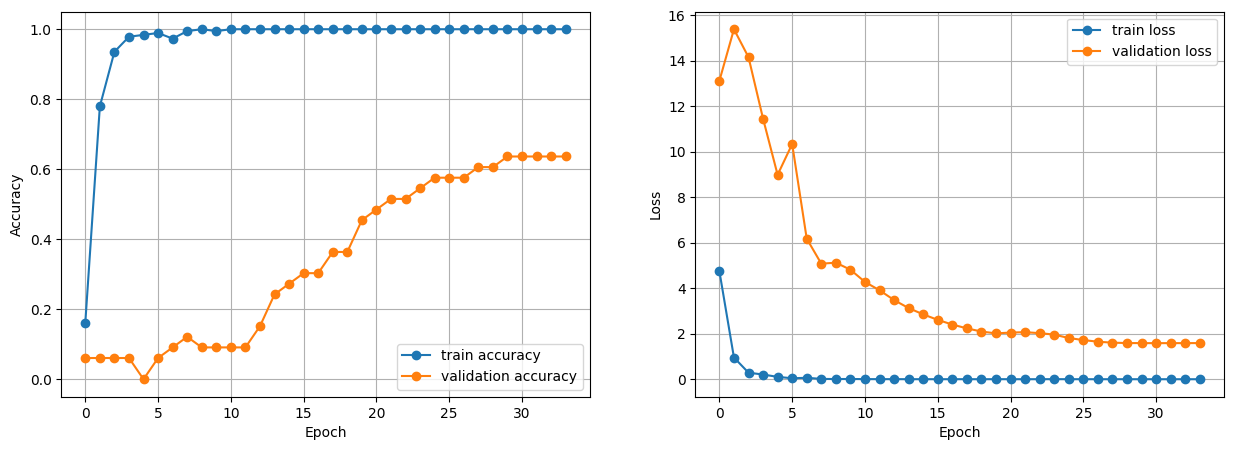

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 [==============================] - 1s 387ms/step - loss: 2.2776 - accuracy: 0.5165

Test Accuracy: 0.5164835453033447

Test Loss: 2.2775845527648926


In [8]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 105ms/step


In [10]:
model_path = './CVPR/final/facial_recognition'

model.save(os.path.join(model_path, "cnn.h5"))

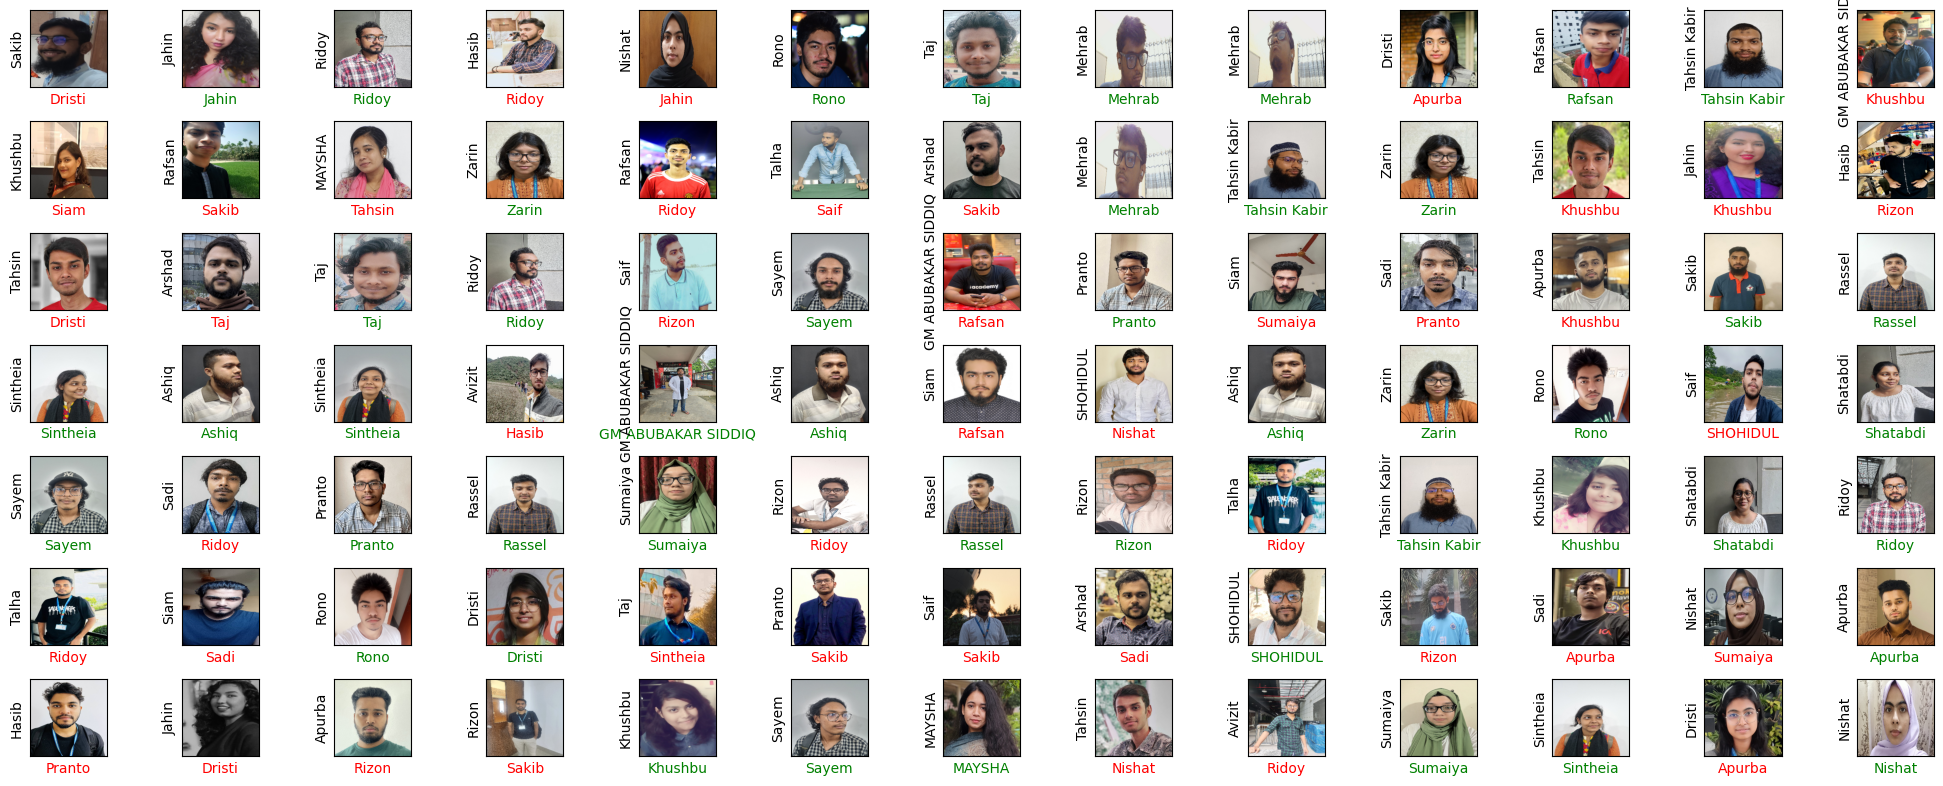

In [9]:
plt.figure(figsize=(20,10))
for i in range(len(X_test)):
    plt.subplot(9, 13, i+1)
    plt.imshow(X_test[i].astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(categories[y_test[i]])
    if y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(categories[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(categories[np.argmax(predictions[i])], color='r')
        
plt.tight_layout()
plt.show()